# Gradient Descent

### 비용 최소화 하기 - 경사 하강법(Gradient Descent) 소개
- 경사 하강법 발생 배경    
    - $w$ 파라미터의 개수가 적다면 고차원 방정식으로 비용 함수가 최소가 되는 $w$ 변숫값을 도출할 수 있겠지만, $w$ 파라미터가 많으면 고차원 방정식을 동원하더라도 해결하기가 어렵습니다.
    - 경사 하강법은 이러한 고차원 방정식에 대한 문제를 해결해 주면서 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 뛰어난 방식입니다.
    
- 경사하강법의 의미
    - '점진적으로' **반복적인 계산을 통해 $w$ 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 $w$ 파라미터**를 구하는 방식입니다.
    - 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 $w$ 파라미터를 지속해서 보정해 나갑니다.(최초 오류 100 -> 두 번째 오류 90 -> 세 번째 오류 80 -> ... 과 같이 계속해서 업데이트 함)
    - 오류 값이 더 작아지지 않을 때 그 오류 값을 최소 비용으로 판단하고 그때의 $w$ 값을 최적 파라미터로 반환합니다. 

- 미분을 통한 비용 함수의 최솟값 찾기
    - 비용 함수가 포물선 형태의 2차 함수라면 경사 하강법은 최초 $w$에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향(이전 $w$에서 최근 $w$를 빼준다.)으로 순차적으로 $w$를 업데이트 합니다.
    - 마침내 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그때의 $w$를 반환합니다.
    - 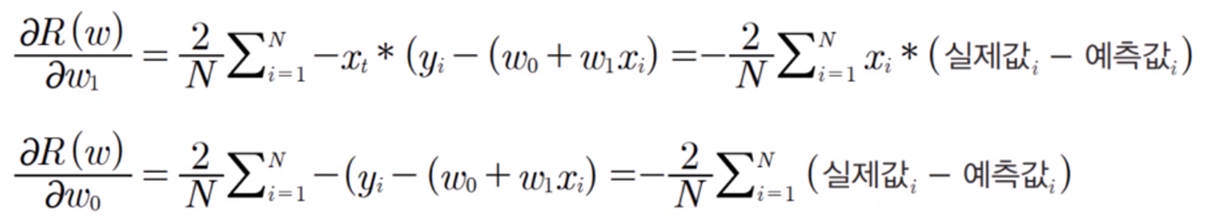


- 경사 하강법은 아래와 같은 새로운 $w_{0}$, $w_{1}$를 반복적으로 업데이트 하면서 비용 함수가 최소가 되는 값을 찾습니다.
    - 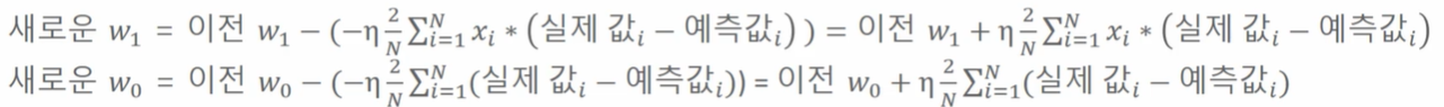

### 실습 코드

**실제값을 $y=4x+6$ 시뮬레이션하는 데이터 값 생성**

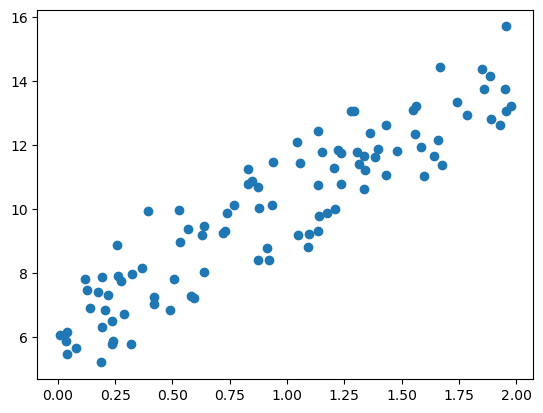

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# y=4X+6 식을 근사(w1=4, w0=6).
# random값은 Noise를 위해 만듦

X = 2*np.random.rand(100,1)
y = 6+4*X + np.random.randn(100,1)

# X, y 데이터셋 scatter plot으로 시각화
plt.scatter(X,y)

In [5]:
X.shape, y.shape

((100, 1), (100, 1))

### 경사하강법 수행 프로세스

**$w_{0}$과 $w_{1}$의 값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성**
- y_pred = np.dot(X, $w_{1}$.T) + $w_{0}$
    - 100개의 데이터가 있을 경우 y_pred = $w_{0} + X_{1}*w_{1}+X_{2}*w_{1}+X_{3}*w_{1}$+ ...+$X_{100}*w_{1}$이며, 이는 입력 배열 **$X$와 $w_{1}$ 배열의 내적**

- 새로은$w_{1}$과 $w_{0}$를 update 함

- 각 값의 형태
    - $X$ : (N, 1)
    - $y$ : (N, 1)
    - $w_{0}$ : (1,1)
    - $w_{1}$ : (1,1)

In [24]:
# w1과 w0를 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, lr = 0.01):

    # N : 데이터 수량
    N = len(y)

    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)   # shape : (1,1)
    w0_update = np.zeros_like(w0)   # shape : (1,1)

    # 예측 배열 계산하고 예측과 실제 값의 차이 계산(예측값 및 차이값)
    y_pred = np.dot(X, w1.T) + w0  # shape : (N,1) ->각 행의 값이 예측값이 됨
    diff = y - y_pred              # shape : (N,1)

    # w0_update를 dot 행렬 연산으로 구하기 위해(스칼라 값으로 변환) 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))  # shape : (N,1)

    # w1과 w0을 업데이트 할 w1_update와 w0_update 계산(미분값 도출)
    w1_update = -(2/N)*lr*np.dot(X.T, diff)       # shape : (1,1)
    w0_update = -(2/N)*lr*np.dot(w0_factors.T, diff)  # shape : (1,1)

    return w1_update, w0_update
    

**반복적으로 경사 하강법을 이용하여 get_weight_updates()를 호출하여 $w_{1}$과 $w_{0}$를 업데이트 하는 함수 생성**

In [25]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0에 업데이트를 적용함.
def gradient_descent_steps(X, y, iters = 10000):

    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, lr = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

**예측 오차 비용 계산을 수행하는 함수 생성 및 경사 하강법 수행**

In [35]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [40]:
w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print(f"w1 : {w1[0,0]}, w0 : {w0[0,0]}")
y_pred = w1[0,0]*X+w0
print(f"Gradient Descent Total Cost : {get_cost(y, y_pred)}")

w1 : 4.021813642697164, w0 : 6.162031224717461
Gradient Descent Total Cost : 0.9934784315632568


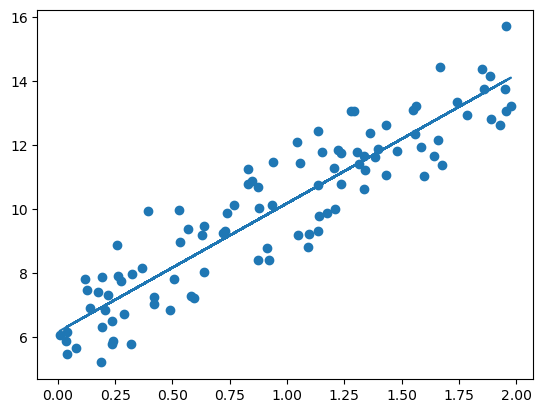

In [41]:
# 실제 데이터 및 선형 모델 비교
plt.scatter(X, y)
plt.plot(X, y_pred)

**미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출**
- 메모리 문제 등으로 인한 미니 배치를 이용한 부분 최적 비용 함수 도출
- 미니 배치 확률적 경사 하강법과 일반 경사 하강법의 결과에 큰 차이가 없음

In [47]:
def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters =1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0

    for ind in range(iters):
        np.random.seed(ind)
        
        # 전체 X, y 데이터에서 랜덤하게 batch_size 만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])

        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]

        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, lr = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0


In [51]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters = 1000)
print(f"w1 : {round(w1[0,0], 3)}, w0 : {round(w0[0,0], 3)}")
y_pred = w1[0,0]*X +w0
print(f'Stochastic Gradient Descent Total Cost : {get_cost(y, y_pred)}')

w1 : 4.028, w0 : 6.156
Stochastic Gradient Descent Total Cost : 0.9937111256675345


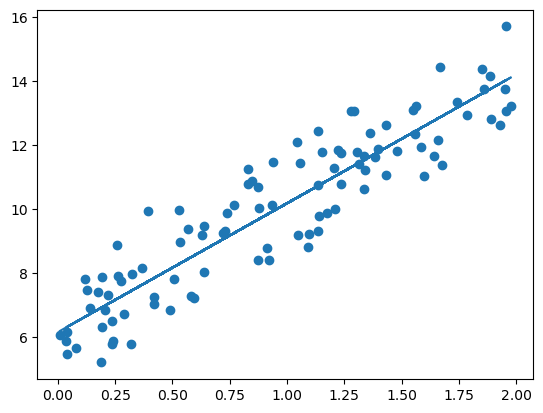

In [54]:
plt.plot(X, y_pred)
plt.scatter(X, y)